In [1]:
from torch import optim
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.triples import TriplesFactory
import pandas as pd
from pykeen.training.callbacks import TrainingCallback
import importlib
import machine_learning

importlib.reload(machine_learning)

<module 'machine_learning' from '/Users/chrisdefra/Documents/oxford/KGS/c73f8a33-88eb-4884-842f-456da3be9123/assignment/machine_learning.py'>

In [2]:
triples_df = pd.read_csv('./data/csvs/triples.csv/part-00000-58e2c5f0-1d2a-4863-8450-cc108a413777-c000.csv')

triples_df

from                edge                 to
0     Normal Blood Pressure  healthyPhenotypeOf               4955
1     Normal Blood Pressure  healthyPhenotypeOf                939
2     Normal Blood Pressure  healthyPhenotypeOf                235
3     Normal Blood Pressure  healthyPhenotypeOf                115
4     Normal Blood Pressure  healthyPhenotypeOf                487
...                     ...                 ...                ...
2216                    289  hasCortisolFeature     upperTailNight
2217                    845  hasCortisolFeature     upperTailNight
2218                   5121  hasCortisolFeature     upperTailNight
2219                   5005  hasCortisolFeature  upperTailPeakTime
2220                    427  hasCortisolFeature     upperTailNight

[2221 rows x 3 columns]

from                edge    to
0    NaN  hasCortisolFeature  4955
1    NaN  hasCortisolFeature   939
2    NaN  hasCortisolFeature   235
3    NaN  hasCortisolFeature   115
4    NaN  hasCortisolFeature   487
..   ...                 ...   ...
209  NaN  hasCortisolFeature   857
210  NaN  hasCortisolFeature  4941
211  NaN  hasCortisolFeature   565
212  NaN  hasCortisolFeature   357
213  NaN  hasCortisolFeature   169

[214 rows x 3 columns]

In [3]:
entity_counts = pd.concat([triples_df['from'], triples_df['to']]).value_counts()
print(f"Average degree: {entity_counts.mean():.2f}")

Average degree: 17.70


In [4]:
triples_factory = TriplesFactory.from_labeled_triples(triples=triples_df[['from','edge','to']].values)

In [5]:
training, testing, validation = triples_factory.split([.8, .1, .1])
triples_factory

using automatically assigned random_state=1516731523


TriplesFactory(num_entities=251, num_relations=3, create_inverse_triples=False, num_triples=2221)

In [6]:
print(machine_learning.summarise_triples_factory(training, testing, validation))

                         Entities  Relations  Triples
Risk to Feature Mapping                              
Training                      251          3     1776
Testing                       251          3      222
Validation                    251          3      223


In [7]:
all_triples = list(training.triples) + list(testing.triples) + list(validation.triples)
graph_triples, _ = triples_factory.split([.2,.8])

Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
using automatically assigned random_state=224798579


## Visualise the triples as a graph

We are going to use Nx to construct the full directed graph and visualise it.  Note, as there are so many relationships, it is advisable to use a smaller sample of the triples to visualise, otherwise it will be too cluttered.

Reconstructing all label-based triples. This is expensive and rarely needed.


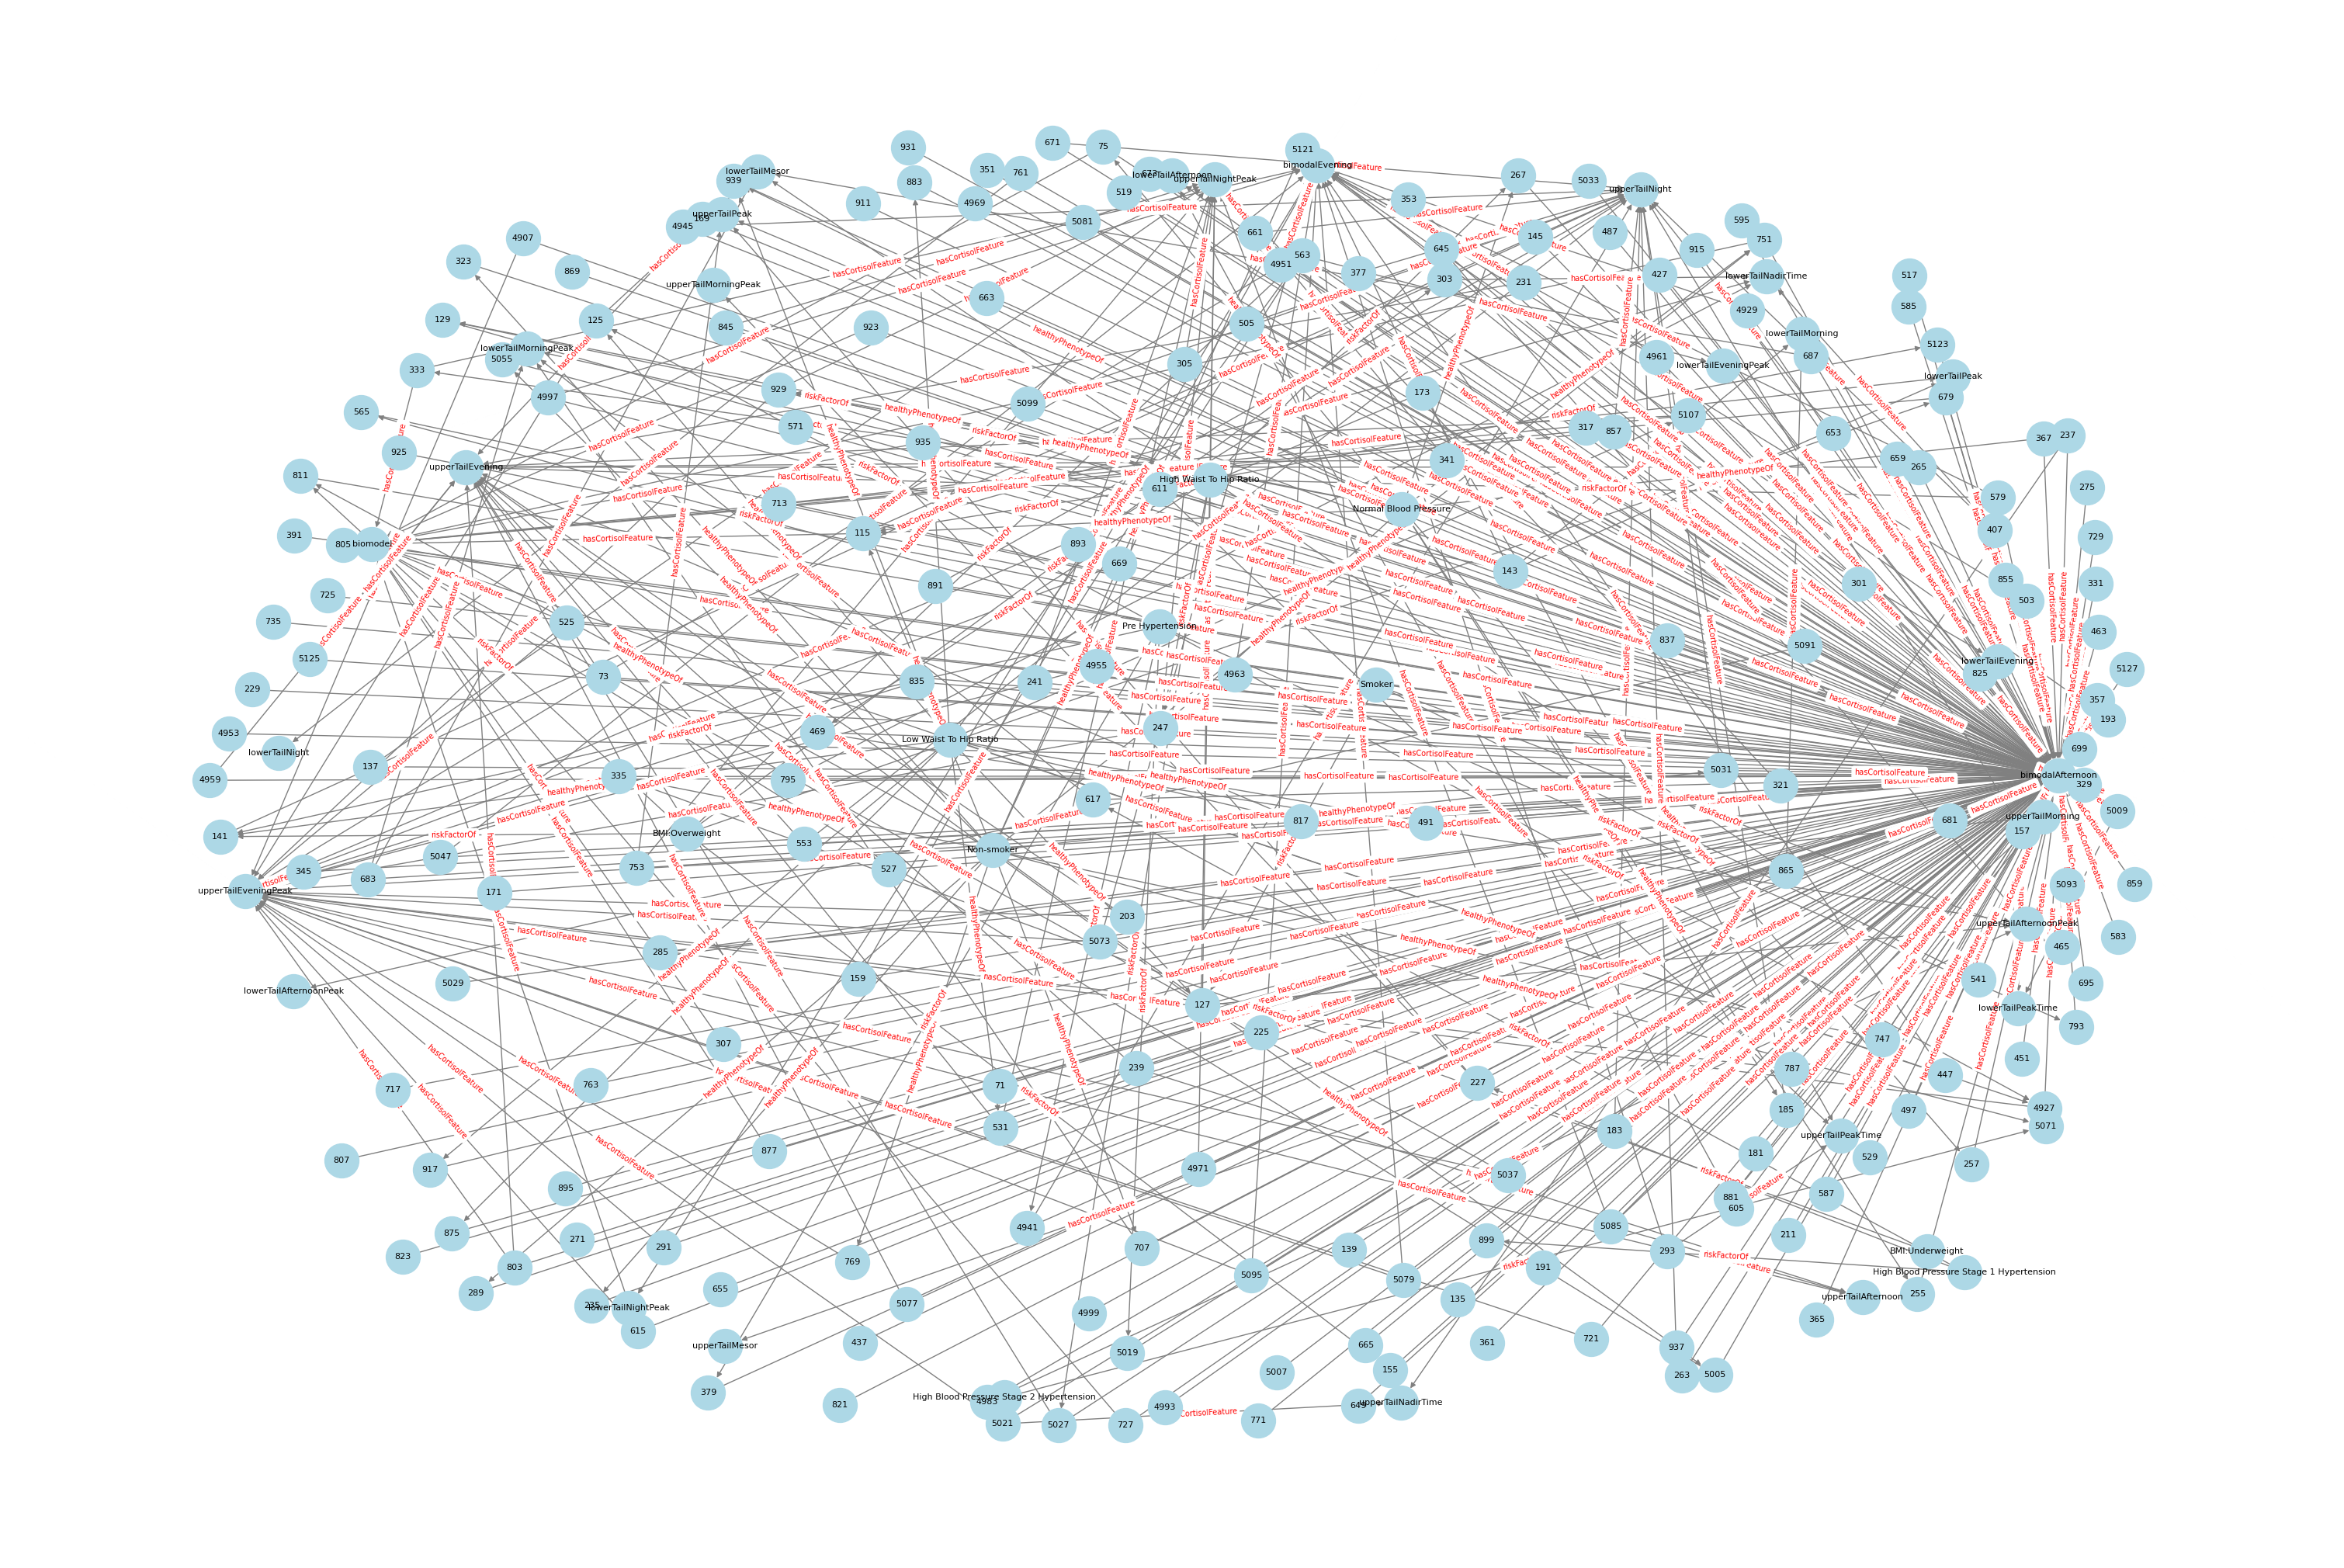

In [8]:
G = nx.DiGraph()

for subj, pred, obj in graph_triples.triples:
    G.add_edge(subj, obj, label=pred)

pos = nx.spring_layout(G, k=0.5, iterations=25)

plt.figure(figsize=(30, 20))  # Width, Height in inches

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=8)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=7)

# Show the plot
plt.show()

### Drawing a subgraph

We are going to look at a subgraph of the triples now, all the persons that are in the Pre Hypertension category.

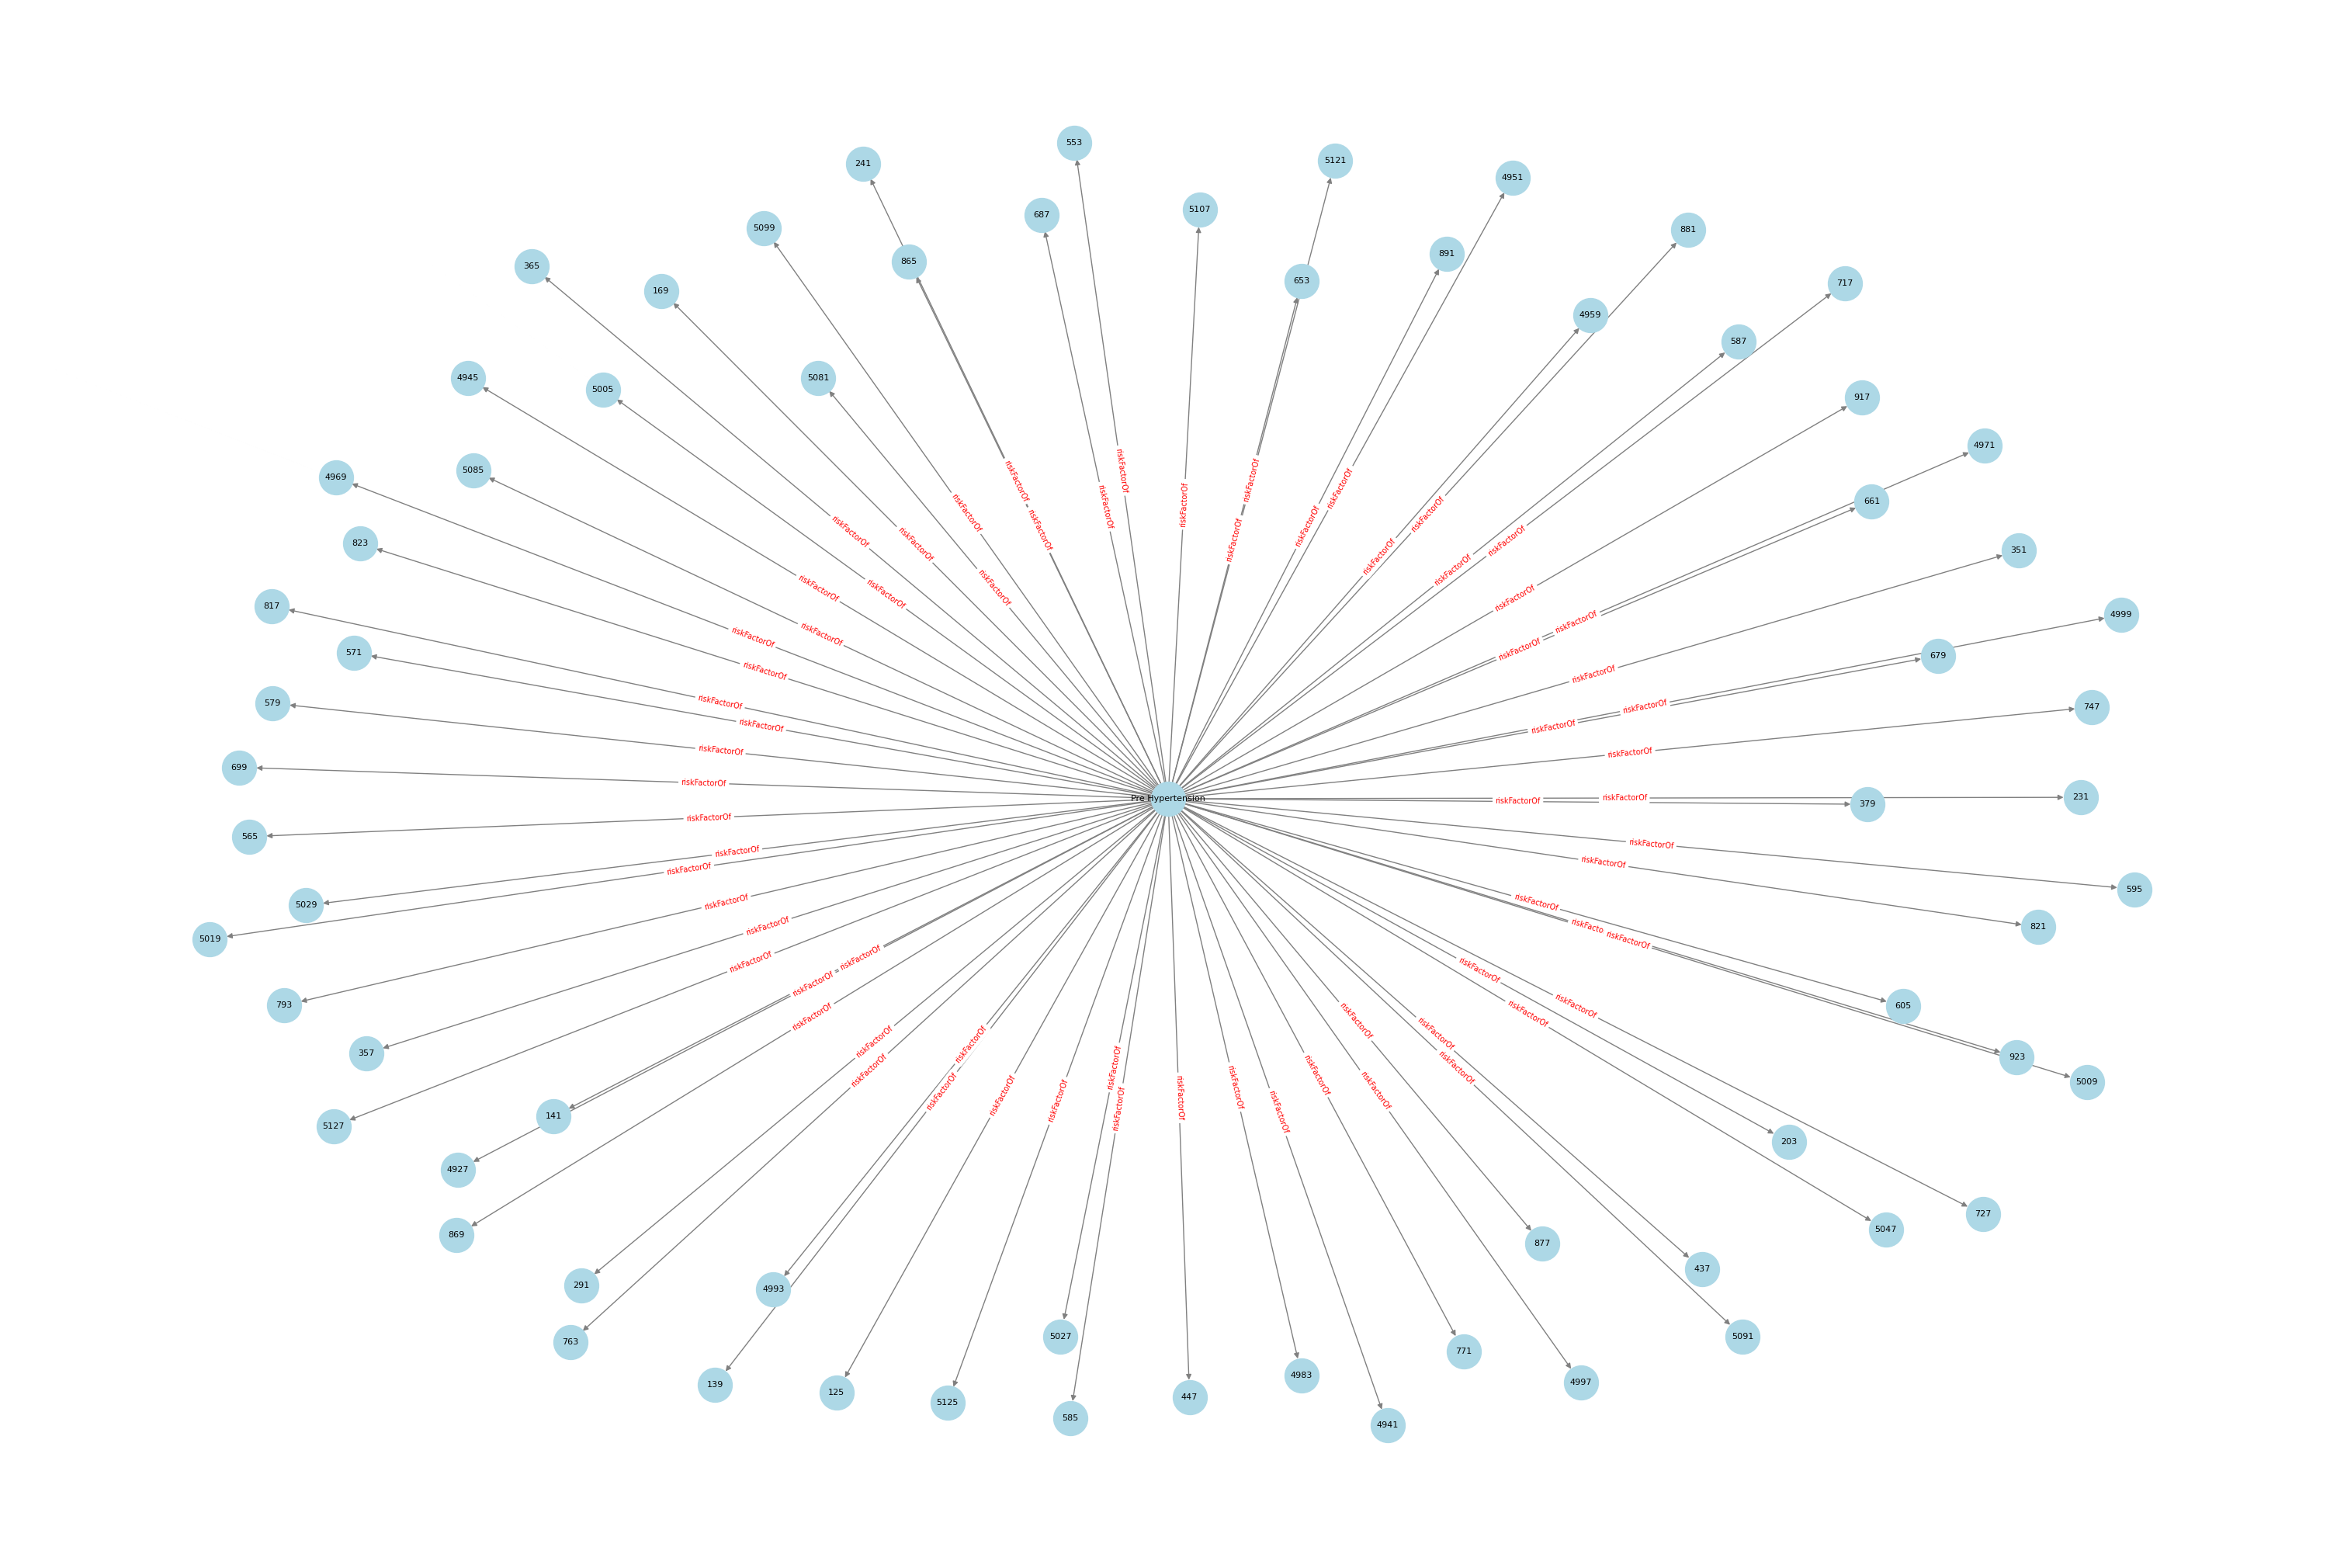

In [9]:
G = nx.DiGraph()

for subj, pred, obj in all_triples:
    if subj.startswith('Pre Hypertension'):
        G.add_edge(subj, obj, label=pred)

pos = nx.spring_layout(G, k=0.5, iterations=25)

plt.figure(figsize=(30, 20))  # Width, Height in inches

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=8)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=7)

# Show the plot
plt.show()

In [10]:
training_triples = training.mapped_triples
validation_triples = validation.mapped_triples
test_triples = testing.mapped_triples

print("Training Triples:\n", training_triples[:5])
print("Validation Triples:\n", validation_triples[:5])
print("Test Triples:\n", test_triples[:5])

training_triples = training.triples
validation_triples = validation.triples
test_triples = testing.triples

print("\n\nTraining Triples with 'Pre Hypertension' risk factor:")
for triple in training_triples:
    if triple[0] == "Pre Hypertension":
        print(triple)
print("\nValidation Triples with 'Pre Hypertension' risk factor:")
for triple in validation_triples:
    if triple[0] == "Pre Hypertension":
        print(triple)
print("\nTest Triples with 'tourism' relationship:")
for triple in test_triples:
    if triple[0] == "Pre Hypertension":
        print(triple)

Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.
Reconstructing all label-based triples. This is expensive and rarely needed.


Training Triples:
 tensor([[  0,   0, 224],
        [  0,   0, 226],
        [  0,   0, 234],
        [  0,   0, 247],
        [  1,   0, 231]])
Validation Triples:
 tensor([[ 76,   0, 242],
        [218,   2, 113],
        [ 37,   0, 248],
        [192,   0, 242],
        [175,   0, 247]])
Test Triples:
 tensor([[223,   2, 131],
        [ 20,   0, 247],
        [219,   1, 185],
        [ 95,   0, 225],
        [222,   2, 169]])


Training Triples with 'Pre Hypertension' risk factor:
['Pre Hypertension' 'riskFactorOf' '125']
['Pre Hypertension' 'riskFactorOf' '4993']
['Pre Hypertension' 'riskFactorOf' '823']
['Pre Hypertension' 'riskFactorOf' '5125']
['Pre Hypertension' 'riskFactorOf' '5127']
['Pre Hypertension' 'riskFactorOf' '917']
['Pre Hypertension' 'riskFactorOf' '881']
['Pre Hypertension' 'riskFactorOf' '5085']
['Pre Hypertension' 'riskFactorOf' '865']
['Pre Hypertension' 'riskFactorOf' '5121']
['Pre Hypertension' 'riskFactorOf' '437']
['Pre Hypertension' 'riskFactorOf' '5047']
[

## Training a model

Now we are going to train the embedding model

In [11]:
from pykeen.models import TransE
from pykeen.models import RotatE
from pykeen.losses import SoftplusLoss
from pykeen.losses import MarginRankingLoss
import torch
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

embedding_dim = 1000
# from pykeen.models import ComplEx
# TransE performed the best at validation, but the predictions didn't take into account assymetry
# model = TransE(
#     triples_factory=training,
#     random_seed=35,
#     embedding_dim=embedding_dim,
#     loss=MarginRankingLoss(),
# )
model = RotatE(
    triples_factory=training,
    random_seed=35,
    embedding_dim=embedding_dim,
    loss=MarginRankingLoss(),
)
# model = RotatE(triples_factory=training, random_seed=35, embedding_dim=483, loss=MarginRankingLoss(margin=1.0))
# model = RotatE(triples_factory=training, random_seed=35, embedding_dim=2000)
# model = ComplEx(triples_factory=training, random_seed=35, embedding_dim=1000)


# optimizer = optim.Adam(params=model.get_grad_params())
# optimizer = optim.SGD(params=model.get_grad_params(), lr=0.02)
optimizer = optim.Adagrad(params=model.get_grad_params(), lr=0.028)
# optimizer = optim.SGD(params=model.get_grad_params(), lr=0.001)
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()


from pykeen.sampling import BasicNegativeSampler
negative_sampler = BasicNegativeSampler(
    mapped_triples=training.mapped_triples,
    num_negs_per_pos=1,
)

In [33]:
# lets start with SLCWA.  We can use LCWA
from pykeen.training import SLCWATrainingLoop
training_loop = SLCWATrainingLoop(
    model=model,
    optimizer=optimizer,
    triples_factory=training,
    negative_sampler=negative_sampler,
)

import warnings
warnings.filterwarnings("ignore")

result = training_loop.train(
    triples_factory=training,
    num_epochs=840,
    batch_size=256,
    callbacks="evaluation-loop",
    callbacks_kwargs=dict(
        prefix='validation',
        factory=validation,
    ),
)
    
# Pick an evaluator
mapped_triples_validation = validation.mapped_triples
validation_results = evaluator.evaluate(
    model=model,
    mapped_triples=mapped_triples_validation,
    batch_size=64,
    additional_filter_triples=[
        training.mapped_triples,
        validation.mapped_triples
    ]
)

results = {
    'mean_rank': validation_results.get_metric('mean_rank'),
    'hits@10': validation_results.get_metric('hits@10'),
    'hits@3': validation_results.get_metric('hits@3'),
    'hits@1': validation_results.get_metric('hits@1'),
    'mean_reciprocal_rank': validation_results.get_metric('mean_reciprocal_rank'),
}
stats = {
    'model': 'TransE',
    'dim:': embedding_dim,
    'optim': 'Adagrad',
    'negative_sampler': 'BasicNegativeSampler',
    'neg_samples': 1,
    'hits@10': results['hits@10'],
    'num_epochs': 840,
    'batch_size': 256,
}
print("Validation Results:\n", validation_results)
print("Mean Rank:", validation_results.get_metric('mean_rank'))

Training epochs on cpu:   0%|          | 0/840 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Enabled filtered evaluation, but not additional filter triples are passed.
Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/7.00 [00:00<?, ?batch/s]

Using automatic batch size on device.type='cpu' can cause unexplained out-of-memory crashes. Therefore, we use a conservative small batch_size=32. Performance may be improved by explicitly specifying a larger batch size.


evaluation:   0%|          | 0.00/14.0 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/223 [00:00<?, ?triple/s]

Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).


Validation Results:
Mean Rank: 21.05829620361328


In [ ]:
cortisol_feature_path = "./embeddings/cortisol-features.pt"
# save model's weights to a file
torch.save(model.state_dict(), cortisol_feature_path)

In [31]:
# source: https://pykeen.readthedocs.io/en/stable/api/pykeen.checkpoints.save_model.html
# cortisol_feature_path = "./embeddings/cortisol-features.pt"
cortisol_feature_path = "./embeddings/assymetric-features.pt"
# save model's weights to a file
# load weights again
state_dict = torch.load(cortisol_feature_path)

model2 = RotatE(triples_factory=training, random_seed=35, embedding_dim=483, loss=MarginRankingLoss(margin=1.0))
# update the model
pred_model = model2.load_state_dict(state_dict)

## Evaluating the model 

In [18]:
head_id = training.entity_to_id['Pre Hypertension']
head_id

222

In [19]:
validation.mapped_triples

tensor([[219,   1, 154],
        [221,   1, 155],
        [150,   0, 247],
        [222,   2, 111],
        [223,   2,  11],
        [154,   0, 225],
        [221,   1, 125],
        [116,   0, 248],
        [197,   0, 247],
        [220,   1,  51],
        [139,   0, 241],
        [ 14,   0, 225],
        [  5,   0, 225],
        [110,   0, 248],
        [ 83,   0, 226],
        [ 11,   0, 226],
        [222,   2, 136],
        [137,   0, 247],
        [ 48,   0, 225],
        [221,   1,  55],
        [106,   0, 242],
        [ 51,   0, 226],
        [215,   2,  87],
        [220,   1, 110],
        [155,   0, 237],
        [218,   2,  78],
        [218,   2,  70],
        [176,   0, 238],
        [ 10,   0, 247],
        [206,   0, 247],
        [223,   2,  71],
        [202,   0, 242],
        [203,   0, 226],
        [141,   0, 233],
        [103,   0, 248],
        [165,   0, 232],
        [220,   1,  21],
        [166,   0, 225],
        [214,   2, 129],
        [ 63,   0, 234],


In [29]:
# Pick an evaluator
from pykeen.evaluation import RankBasedEvaluator
evaluator = RankBasedEvaluator()

# After training and validation evaluation, select the best model

# Now, evaluate the selected/best model on the test set
mapped_triples_test = testing.mapped_triples
test_results = evaluator.evaluate(model,
                                  mapped_triples_test,
                                  batch_size=1024)
print("Test Results:\n", test_results)

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]



Evaluating on cpu:   0%|          | 0.00/222 [00:00<?, ?triple/s]

Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).


Test Results:


In [31]:
test_results.get_metric('mean_rank')
test_results.get_metric('hits@10')

0.44594594594594594

In [16]:
# Visualize the KG for "tourism" edges after evaluation

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph (only include "tourism" edges)
for subj, pred, obj in all_triples:
    if pred == 'tourism':
        G.add_edge(subj, obj, label=pred)

# Set a fixed seed for the layout to ensure reproducibility
seed = 42
pos = nx.spring_layout(G, k=0.5, iterations=20, seed=seed)  # Fixed seed for reproducibility

# Set the size of the Matplotlib figure
plt.figure(figsize=(15, 10))  # Width, Height in inches

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

# Show the plot
plt.show()

In [49]:
triples_df

from                edge                 to
0     Normal Blood Pressure  healthyPhenotypeOf               4955
1     Normal Blood Pressure  healthyPhenotypeOf                939
2     Normal Blood Pressure  healthyPhenotypeOf                235
3     Normal Blood Pressure  healthyPhenotypeOf                115
4     Normal Blood Pressure  healthyPhenotypeOf                487
...                     ...                 ...                ...
2216                    289  hasCortisolFeature     upperTailNight
2217                    845  hasCortisolFeature     upperTailNight
2218                   5121  hasCortisolFeature     upperTailNight
2219                   5005  hasCortisolFeature  upperTailPeakTime
2220                    427  hasCortisolFeature     upperTailNight

[2221 rows x 3 columns]

In [76]:
### unique values
healthy = triples_df[triples_df['edge'] == 'healthyPhenotypeOf']['from'].unique()
risk_factors = triples_df[triples_df['edge'] == 'riskFactorOf']['from'].unique()
user_ids = triples_df[(triples_df['edge'] == 'healthyPhenotypeOf') | (triples_df['edge'] == 'riskFactorOf')]['to'].unique()
features = triples_df[triples_df['edge'] == 'hasCortisolFeature']['to'].unique()

### Predictions

Now we're going to use the saved model to make some predictions.  But first we need to filter out and user ids from the predictions. As we only want to see the cortisol features.

In [86]:
filter_to_df = pd.DataFrame()
filter_from_df = pd.DataFrame()
filter_to_df['to'] = triples_df[(triples_df['edge'] == 'healthyPhenotypeOf') | (triples_df['edge'] == 'riskFactorOf')]['to'].unique()
filter_to_df['from'] = triples_df[(triples_df['edge'] == 'healthyPhenotypeOf') | (triples_df['edge'] == 'riskFactorOf')]['to'].unique()

filter_from_df['from'] = triples_df[(triples_df['edge'] == 'healthyPhenotypeOf') | (triples_df['edge'] == 'riskFactorOf')]['from'].unique()
filter_from_df['to'] = triples_df[(triples_df['edge'] == 'healthyPhenotypeOf') | (triples_df['edge'] == 'riskFactorOf')]['from'].unique()
filter_to_df['edge'] = 'hasCortisolFeature'
filter_from_df['edge'] = 'hasCortisolFeature'

filter_feature_from_df = pd.DataFrame()
filter_feature_from_df['from'] = features
filter_feature_from_df['to'] = None
filter_feature_from_df['edge'] = 'hasCortisolFeature'
filter_to_df

to  from                edge
0    4955  4955  hasCortisolFeature
1     939   939  hasCortisolFeature
2     235   235  hasCortisolFeature
3     115   115  hasCortisolFeature
4     487   487  hasCortisolFeature
..    ...   ...                 ...
209   857   857  hasCortisolFeature
210  4941  4941  hasCortisolFeature
211   565   565  hasCortisolFeature
212   357   357  hasCortisolFeature
213   169   169  hasCortisolFeature

[214 rows x 3 columns]

In [60]:
from pykeen.predict import predict_target

In [94]:
hypertension_filter = pd.concat([filter_to_df,filter_from_df])
hypertension_filter['from'] = 'BMI:'
predicted_tails = predict_target(model=model2,head='Pre Hypertension', relation='hasCortisolFeature', triples_factory=triples_factory)
predicted_tails = predicted_tails.filter_triples(hypertension_filter[['from', 'edge', 'to']].values)
predicted_tails.df

tail_id     score              tail_label
224      224 -6.074488        bimodalAfternoon
225      225 -6.116906          bimodalEvening
226      226 -6.245544                biomodel
247      247 -6.320282          upperTailNight
242      242 -6.334735    upperTailEveningPeak
228      228 -6.446696  lowerTailAfternoonPeak
233      233 -6.459195    lowerTailMorningPeak
248      248 -6.467824      upperTailNightPeak
230      230 -6.493406    lowerTailEveningPeak
236      236 -6.527391      lowerTailNightPeak
250      250 -6.572256       upperTailPeakTime
232      232 -6.599531        lowerTailMorning
235      235 -6.604314          lowerTailNight
234      234 -6.638803      lowerTailNadirTime
237      237 -6.641275           lowerTailPeak
246      246 -6.658952      upperTailNadirTime
231      231 -6.672071          lowerTailMesor
229      229 -6.676628        lowerTailEvening
227      227 -6.701216      lowerTailAfternoon
238      238 -6.701249       lowerTailPeakTime
241      241 -6.729464        upperTailEvening
239      239 -6.744277      upperTailAfternoon
243      243 -6.779364          upperTailMesor
244      244 -6.840185        upperTailMorning
249      249 -6.917953           upperTailPeak
245      245 -6.920603    upperTailMorningPeak
240      240 -7.044907  upperTailAfternoonPeak

In [ ]:
hypertension_filter = pd.concat([filter_to_df,filter_from_df])
hypertension_filter['from'] = 'Pre Hypertension'
predicted_tails = predict_target(model=model2,head='Pre Hypertension', relation='hasCortisolFeature', triples_factory=triples_factory)
predicted_tails = predicted_tails.filter_triples(hypertension_filter[['from', 'edge', 'to']].values)
predicted_tails.df

In [118]:
bimodal_filter = pd.concat([filter_to_df,filter_feature_from_df])
bimodal_filter['to'] = 'upperTailMesor'
predicted_tails = predict_target(model=model2,tail='upperTailMesor', relation='hasCortisolFeature', triples_factory=triples_factory)
predicted_tails = predicted_tails.filter_triples(bimodal_filter[['from', 'edge', 'to']].values)
predicted_tails.df

head_id     score                                head_label
220      220 -6.633692                                Non-smoker
219      219 -6.673111                    Low Waist To Hip Ratio
221      221 -6.725520                     Normal Blood Pressure
216      216 -6.731857  High Blood Pressure Stage 1 Hypertension
218      218 -6.770073                   High Waist To Hip Ratio
222      222 -6.779364                          Pre Hypertension
214      214 -6.802475                            BMI:Overweight
217      217 -6.902275  High Blood Pressure Stage 2 Hypertension
223      223 -7.004024                                    Smoker
215      215 -7.088436                           BMI:Underweight

In [95]:
hypertension_filter = pd.concat([filter_to_df,filter_from_df])
hypertension_filter['from'] = 'BMI:Overweight'
predicted_tails = predict_target(model=model2,head='BMI:Overweight', relation='hasCortisolFeature', triples_factory=triples_factory)
predicted_tails = predicted_tails.filter_triples(hypertension_filter[['from', 'edge', 'to']].values)
predicted_tails.df

tail_id     score              tail_label
224      224 -6.187800        bimodalAfternoon
242      242 -6.230488    upperTailEveningPeak
225      225 -6.331984          bimodalEvening
247      247 -6.394438          upperTailNight
226      226 -6.437528                biomodel
248      248 -6.486119      upperTailNightPeak
236      236 -6.542373      lowerTailNightPeak
250      250 -6.556369       upperTailPeakTime
228      228 -6.592113  lowerTailAfternoonPeak
241      241 -6.610996        upperTailEvening
230      230 -6.646693    lowerTailEveningPeak
238      238 -6.668583       lowerTailPeakTime
235      235 -6.691745          lowerTailNight
227      227 -6.706936      lowerTailAfternoon
244      244 -6.730860        upperTailMorning
239      239 -6.747500      upperTailAfternoon
240      240 -6.754969  upperTailAfternoonPeak
234      234 -6.756749      lowerTailNadirTime
243      243 -6.802475          upperTailMesor
233      233 -6.810279    lowerTailMorningPeak
249      249 -6.818615           upperTailPeak
232      232 -6.820861        lowerTailMorning
229      229 -6.843026        lowerTailEvening
237      237 -6.882782           lowerTailPeak
246      246 -6.891006      upperTailNadirTime
231      231 -6.960250          lowerTailMesor
245      245 -6.972950    upperTailMorningPeak

In [116]:
from_field = 'BMI:Overweight'
hypertension_filter = pd.concat([filter_to_df,filter_from_df])
hypertension_filter['from'] = from_field
predicted_tails = predict_target(model=model2,head=from_field, relation='hasCortisolFeature', triples_factory=triples_factory)
predicted_tails = predicted_tails.filter_triples(hypertension_filter[['from', 'edge', 'to']].values)
predicted_tails.df

tail_id     score              tail_label
224      224 -6.187800        bimodalAfternoon
242      242 -6.230488    upperTailEveningPeak
225      225 -6.331984          bimodalEvening
247      247 -6.394438          upperTailNight
226      226 -6.437528                biomodel
248      248 -6.486119      upperTailNightPeak
236      236 -6.542373      lowerTailNightPeak
250      250 -6.556369       upperTailPeakTime
228      228 -6.592113  lowerTailAfternoonPeak
241      241 -6.610996        upperTailEvening
230      230 -6.646693    lowerTailEveningPeak
238      238 -6.668583       lowerTailPeakTime
235      235 -6.691745          lowerTailNight
227      227 -6.706936      lowerTailAfternoon
244      244 -6.730860        upperTailMorning
239      239 -6.747500      upperTailAfternoon
240      240 -6.754969  upperTailAfternoonPeak
234      234 -6.756749      lowerTailNadirTime
243      243 -6.802475          upperTailMesor
233      233 -6.810279    lowerTailMorningPeak
249      249 -6.818615           upperTailPeak
232      232 -6.820861        lowerTailMorning
229      229 -6.843026        lowerTailEvening
237      237 -6.882782           lowerTailPeak
246      246 -6.891006      upperTailNadirTime
231      231 -6.960250          lowerTailMesor
245      245 -6.972950    upperTailMorningPeak

In [117]:
from pykeen.predict import predict_all

pack = predict_all(model=model)
pred = pack.process(factory=triples_factory)
pred.filter_triples(triples_factory)
pred.df

predict is an expensive operation, involving 189,003 score evaluations.
Not providing k to `predict_all` entails huge memory requirements for reasonably-sized knowledge graphs.


scoring:   0%|          | 0.00/753 [00:00<?, ?batch/s]

head_id head_label  relation_id      relation_label  tail_id  \
0            42        293            2        riskFactorOf       42   
1            71        465            2        riskFactorOf       71   
2           159        707            2        riskFactorOf      159   
3            40        289            2        riskFactorOf       40   
4           223     Smoker            2        riskFactorOf      223   
...         ...        ...          ...                 ...      ...   
188998       63        379            0  hasCortisolFeature      147   
188999      115       5095            2        riskFactorOf      102   
189000       30        241            2        riskFactorOf       86   
189001      201        893            1  healthyPhenotypeOf      182   
189002       74       4907            1  healthyPhenotypeOf      169   

       tail_label      score  
0             293 -27.229115  
1             465 -27.229115  
2             707 -27.229115  
3             289 -27.229115  
4          Smoker -27.229115  
...           ...        ...  
188998        661 -48.369392  
188999       5033 -48.432644  
189000       4969 -48.460152  
189001        807 -48.577385  
189002        747 -48.663399  

[189003 rows x 7 columns]